# Coupon Recommendation

- Problem Statement

This data was collected via a survey on the Ecom website Mechanical Turk. The survey describes different driving scenarios including the user’s destination, current time, weather, passenger, coupon attributes, user attributes, and contextual attributes, and then asks the user whether he/she will accept the coupon or not.

- Data Dictionary

1. Gender: Female, Male
2. Age: 21, 46, 26, 31, 41, 50plus, 36, below21
3. Marital Status: Unmarried partner, Single, Married partner, Divorced, Widowed
4. has_Children: 1: has children, 0: No children
5. Education: Some colleges — no degree, bachelor’s degree, Associates degree, High School Graduate, Graduate degree (Master or Doctorate), Some High School
6. Occupation: Traveller’s occupation 
7. Income: income of the traveler
8. Car: Description of vehicle driven by the traveller
9. Bar: how many times does the traveler go to a bar every month? 10. Coffee House: how many times does the user go to a coffeehouse every month? 
10. Carry Away: how many times does the user get takeaway food every month? 
11. RestaurantLessThan20: how many times does the user go to a restaurant with an average expense per person of less than 20   every month? 
12. Restaurant20To50: how many times does the user go to a restaurant with an average expense per person of 20 — 50 every month
13. Destination: destination of traveler
14. Passenger: who are the passengers in the car 
15. Weather: weather when the user is driving (Sunny, Rainy, Snowy)
16. Temperature: temperature in Fahrenheit when the user is driving 
17. Cupon: Type of Cupon
18. Expiration: Validity of Cupon
19. toCoupon_GEQ5min: driving distance to the restaurant/cafe/bar for using the coupon is greater than 5 minutes (0,1)
20. toCoupon_GEQ15min: driving distance to the restaurant/cafe/bar for using the coupon is greater than 15 minutes (0,1)
21. toCoupon_GEQ25min: driving distance to the restaurant/cafe/bar for using the coupon is greater than 25 minutes (0,1)
22. direction_same: whether the restaurant/cafe/bar is in the same direction as the traveler’s current destination (0,1)
23. direction_opp: whether the restaurant/cafe/bar is in the opposite direction as the user’s current destination (0,1)
23. Accept(Y/N?)- Target column( whether user will accept the coupon or not?)

- Import Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Data.csv")
pd.set_option("display.max_columns", None)

In [3]:
df.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
df.shape

(12684, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [6]:
df.nunique()

destination              3
passanger                4
weather                  3
temperature              3
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
car                      5
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
Accept(Y/N?)             2
dtype: int64

In [7]:
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Accept(Y/N?)                0
dtype: int64

In [8]:
df.isnull().sum()/len(df)*100

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Accept(Y/N?)             0.000000
dtype: float64

# Data Processing

- Treating missing values

In [9]:
#Feature "car" contains 99% of missing value, so we can drop it.
df.drop(["car"], axis = 1, inplace = True)

In [10]:
# Checking if there is any value missing in the row

missing_values_mask = df.isna().all(axis=1)
num_rows_with_missing_values = missing_values_mask.sum()
print("Number of rows with all missing values:", num_rows_with_missing_values)

Number of rows with all missing values: 0


In [11]:
df["Bar"].value_counts()

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

In [12]:
df["Bar"].fillna("never", inplace = True)

In [13]:
df["CoffeeHouse"].value_counts()

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

In [14]:
df["CoffeeHouse"].fillna("less1", inplace = True)

In [15]:
df["CarryAway"].value_counts()

1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: CarryAway, dtype: int64

In [16]:
df["CarryAway"].fillna("1~3", inplace = True)

In [17]:
df["RestaurantLessThan20"].value_counts()

1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: RestaurantLessThan20, dtype: int64

In [18]:
df["RestaurantLessThan20"].fillna("1~3", inplace = True)

In [19]:
df["Restaurant20To50"].value_counts()

less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: Restaurant20To50, dtype: int64

In [20]:
df["Restaurant20To50"].fillna("less1", inplace = True)

In [21]:
df["Accept(Y/N?)"].value_counts()

1    7210
0    5474
Name: Accept(Y/N?), dtype: int64

In [22]:
df.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Accept(Y/N?)            0
dtype: int64

- Data Reduction 

In [23]:
# As the feature "toCoupon_GEQ5min" has unique value i.e. 1, it will not have significant impact on the target variable as it
# is a constnt value. So we can drop this feature.
df["toCoupon_GEQ5min"].value_counts()

1    12684
Name: toCoupon_GEQ5min, dtype: int64

In [24]:
df.drop(["toCoupon_GEQ5min"], axis = 1, inplace = True)

- Dropping duplicate rows

In [25]:
# Finding Duplicate rows
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (291, 23)


In [26]:
df.count()

destination             12684
passanger               12684
weather                 12684
temperature             12684
coupon                  12684
expiration              12684
gender                  12684
age                     12684
maritalStatus           12684
has_children            12684
education               12684
occupation              12684
income                  12684
Bar                     12684
CoffeeHouse             12684
CarryAway               12684
RestaurantLessThan20    12684
Restaurant20To50        12684
toCoupon_GEQ15min       12684
toCoupon_GEQ25min       12684
direction_same          12684
direction_opp           12684
Accept(Y/N?)            12684
dtype: int64

In [27]:
# Dropping the duplicate rows
df = df.drop_duplicates() 

In [28]:
df.shape

(12393, 23)

In [29]:
df.describe()

,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
count,12393.000000,12393.000000,12393.000000,12393.000000,12393.000000,12393.000000,12393.000000
mean,63.252643,0.415557,0.563625,0.118051,0.213750,0.786250,0.565803
std,19.075396,0.492838,0.495955,0.322681,0.409969,0.409969,0.495671
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
print(df.info())
print("*"*50)
print(df.nunique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12393 entries, 0 to 12683
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12393 non-null  object
 1   passanger             12393 non-null  object
 2   weather               12393 non-null  object
 3   temperature           12393 non-null  int64 
 4   coupon                12393 non-null  object
 5   expiration            12393 non-null  object
 6   gender                12393 non-null  object
 7   age                   12393 non-null  object
 8   maritalStatus         12393 non-null  object
 9   has_children          12393 non-null  int64 
 10  education             12393 non-null  object
 11  occupation            12393 non-null  object
 12  income                12393 non-null  object
 13  Bar                   12393 non-null  object
 14  CoffeeHouse           12393 non-null  object
 15  CarryAway             12393 non-null

# EDA Univariate Analysis

In [31]:
df.corr()

,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
temperature,1.000000,-0.016963,-0.141124,-0.230067,0.088885,-0.088885,0.064074
has_children,-0.016963,1.000000,0.078686,-0.011651,-0.032276,0.032276,-0.044889
toCoupon_GEQ15min,-0.141124,0.078686,1.000000,0.321919,-0.297284,0.297284,-0.086050
toCoupon_GEQ25min,-0.230067,-0.011651,0.321919,1.000000,-0.190759,0.190759,-0.107855
direction_same,0.088885,-0.032276,-0.297284,-0.190759,1.000000,-1.000000,0.016356
direction_opp,-0.088885,0.032276,0.297284,0.190759,-1.000000,1.000000,-0.016356
Accept(Y/N?),0.064074,-0.044889,-0.086050,-0.107855,0.016356,-0.016356,1.000000


<Axes: >

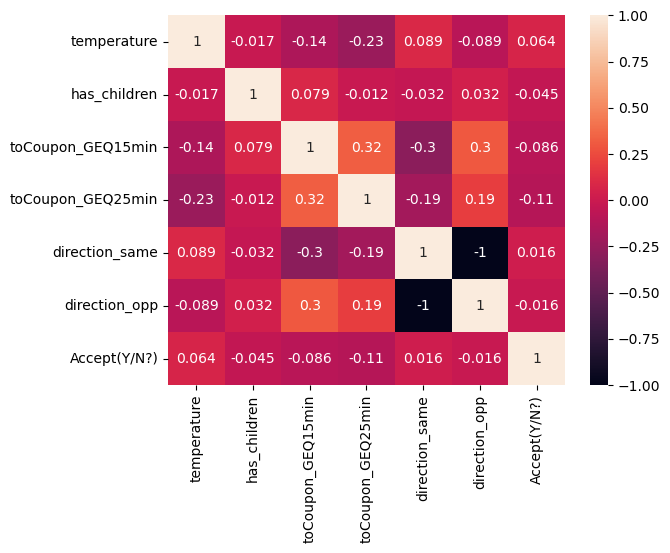

In [32]:
sns.heatmap(df.corr(), annot = True)

In [33]:
# The features "direction_same" and "direction_opp" are highly correlated(-ve), we can drop one feature from this
df.drop(["direction_opp"], axis = 1, inplace = True)

In [34]:
corr_mat = df.corr()

In [35]:
corr_mat["Accept(Y/N?)"]

temperature          0.064074
has_children        -0.044889
toCoupon_GEQ15min   -0.086050
toCoupon_GEQ25min   -0.107855
direction_same       0.016356
Accept(Y/N?)         1.000000
Name: Accept(Y/N?), dtype: float64

We did not found any correlation between this variables and target veriable. Accept(Y/N?) has very bad correlation with all the numeric features. 

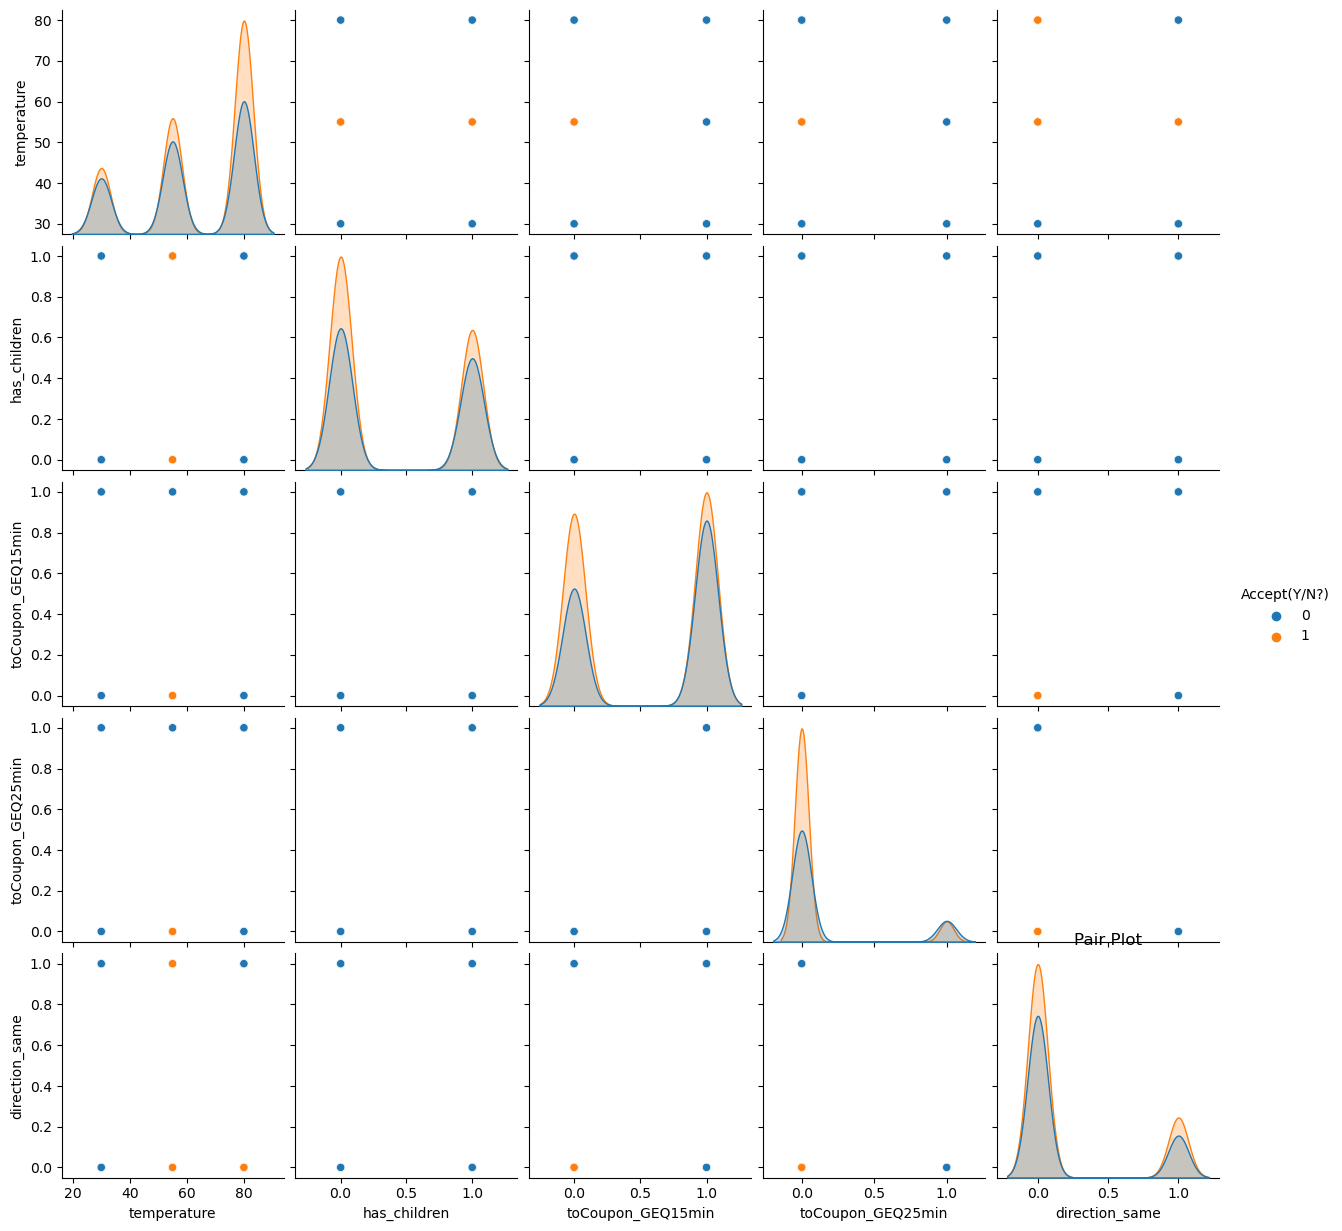

In [36]:
sns.pairplot(df, hue='Accept(Y/N?)')
plt.title('Pair Plot')
plt.show()

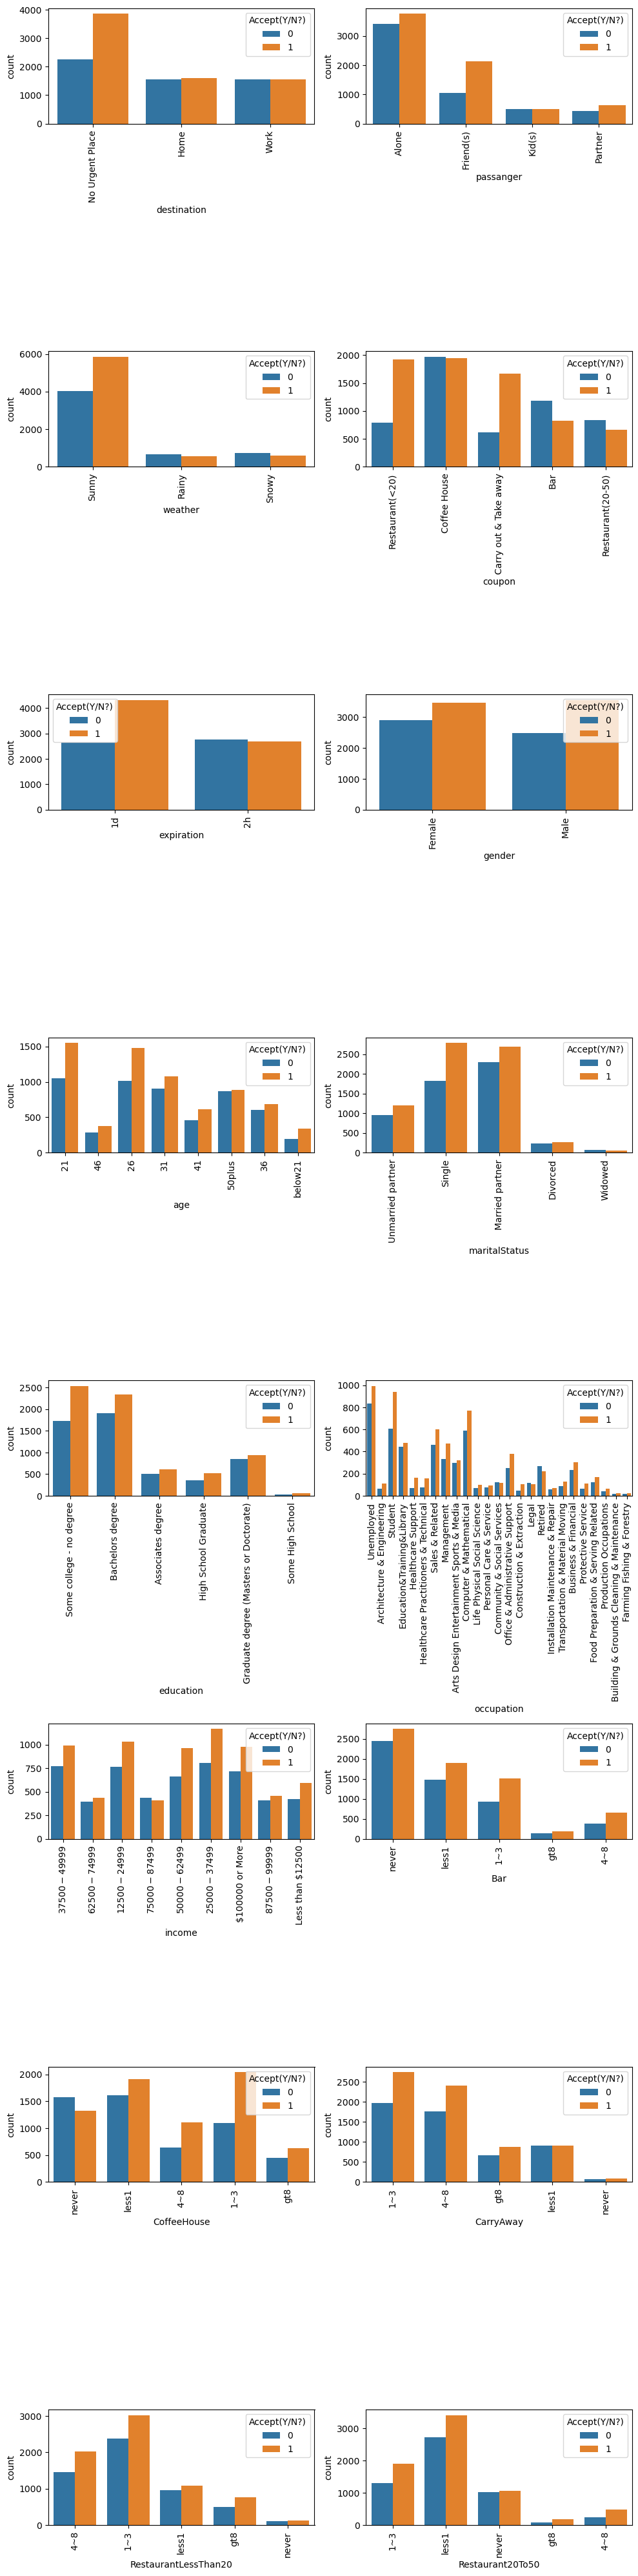

In [37]:
# get the name of all the columns with the data type "Object" (Categorical Variable)
cat_vars = df.select_dtypes(include = ["object"]).columns.tolist()

# Creating figure with subplots, but only include the required number of subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 1) // 2 # To make sure that there are enough rows for the subplots 
fig, axs = plt.subplots(nrows = num_rows, ncols = 2, figsize = (10, 5*num_rows))
axs = axs.flatten()

# Creating count plot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x = var, hue = "Accept(Y/N?)", data = df, ax = axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)
    
# Remove any remaining blank subplot
for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])
    
# Adjusting spacinng between the plots
fig.tight_layout()

# Show plots
plt.show()

- to get object (categorical) variables only

In [38]:
df.select_dtypes(include = ["object"]).head()

,destination,passanger,weather,coupon,expiration,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
0,No Urgent Place,Alone,Sunny,Restaurant(<20),1d,Female,21,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3
1,No Urgent Place,Friend(s),Sunny,Coffee House,2h,Female,21,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3
2,No Urgent Place,Friend(s),Sunny,Carry out & Take away,2h,Female,21,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3
3,No Urgent Place,Friend(s),Sunny,Coffee House,2h,Female,21,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3
4,No Urgent Place,Friend(s),Sunny,Coffee House,1d,Female,21,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3


In [39]:
obj_var = df.select_dtypes(include = ["object"]).columns
obj_var

Index(['destination', 'passanger', 'weather', 'coupon', 'expiration', 'gender',
       'age', 'maritalStatus', 'education', 'occupation', 'income', 'Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'],
      dtype='object')

# Feature Transforming

- Label Encoding (Feature Transforming)

In [40]:
df["occupation"].value_counts()/len(df["occupation"])*100

for col in df.columns:
    print(df[col].value_counts()/len(df[col])*100, "labels")
    print("-"*75)

No Urgent Place    49.366578
Home               25.506334
Work               25.127088
Name: destination, dtype: float64 labels
---------------------------------------------------------------------------
Alone        57.919793
Friend(s)    25.546680
Partner       8.617768
Kid(s)        7.915759
Name: passanger, dtype: float64 labels
---------------------------------------------------------------------------
Sunny    79.577181
Snowy    10.723796
Rainy     9.699024
Name: weather, dtype: float64 labels
---------------------------------------------------------------------------
80    51.061083
55    30.888405
30    18.050512
Name: temperature, dtype: float64 labels
---------------------------------------------------------------------------
Coffee House             31.574276
Restaurant(<20)          21.851045
Carry out & Take away    18.357137
Bar                      16.218833
Restaurant(20-50)        11.998709
Name: coupon, dtype: float64 labels
-------------------------------------------

To convert the categorical variables to numeric we are performing label encoding here. It will assigne the varibales with some numeric values.

In [41]:
df_num = df.select_dtypes(np.number)
df_cat = df.select_dtypes(np.object)
df_cat.head(3)

,destination,passanger,weather,coupon,expiration,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
0,No Urgent Place,Alone,Sunny,Restaurant(<20),1d,Female,21,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3
1,No Urgent Place,Friend(s),Sunny,Coffee House,2h,Female,21,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3
2,No Urgent Place,Friend(s),Sunny,Carry out & Take away,2h,Female,21,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3


In [42]:
for col in df_cat.columns:
    print(col, ": ", len(df_cat[col].unique()), "labels")

destination :  3 labels
passanger :  4 labels
weather :  3 labels
coupon :  5 labels
expiration :  2 labels
gender :  2 labels
age :  8 labels
maritalStatus :  5 labels
education :  6 labels
occupation :  25 labels
income :  9 labels
Bar :  5 labels
CoffeeHouse :  5 labels
CarryAway :  5 labels
RestaurantLessThan20 :  5 labels
Restaurant20To50 :  5 labels


In [43]:
# making list with most frequent occupation

top_15_occupation = [x for x in df_cat.occupation.value_counts().sort_values(ascending = True).head(15).index]
top_15_occupation

['Farming Fishing & Forestry',
 'Building & Grounds Cleaning & Maintenance',
 'Production Occupations',
 'Installation Maintenance & Repair',
 'Construction & Extraction',
 'Life Physical Social Science',
 'Protective Service',
 'Personal Care & Service',
 'Architecture & Engineering',
 'Transportation & Material Moving',
 'Legal',
 'Community & Social Services',
 'Healthcare Practitioners & Technical',
 'Healthcare Support',
 'Food Preparation & Serving Related']

In [44]:
# we make binary variables out of it

for label in top_15_occupation:
    df_cat[label] = np.where(df_cat["occupation"] == label, 1, 0)
    
df_cat_occ= df_cat[top_15_occupation]
df_cat_occ

,Farming Fishing & Forestry,Building & Grounds Cleaning & Maintenance,Production Occupations,Installation Maintenance & Repair,Construction & Extraction,Life Physical Social Science,Protective Service,Personal Care & Service,Architecture & Engineering,Transportation & Material Moving,Legal,Community & Social Services,Healthcare Practitioners & Technical,Healthcare Support,Food Preparation & Serving Related
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12680,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12681,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12682,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
df_cat.head()

,destination,passanger,weather,coupon,expiration,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,Farming Fishing & Forestry,Building & Grounds Cleaning & Maintenance,Production Occupations,Installation Maintenance & Repair,Construction & Extraction,Life Physical Social Science,Protective Service,Personal Care & Service,Architecture & Engineering,Transportation & Material Moving,Legal,Community & Social Services,Healthcare Practitioners & Technical,Healthcare Support,Food Preparation & Serving Related
0,No Urgent Place,Alone,Sunny,Restaurant(<20),1d,Female,21,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,No Urgent Place,Friend(s),Sunny,Coffee House,2h,Female,21,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,No Urgent Place,Friend(s),Sunny,Carry out & Take away,2h,Female,21,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,No Urgent Place,Friend(s),Sunny,Coffee House,2h,Female,21,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,No Urgent Place,Friend(s),Sunny,Coffee House,1d,Female,21,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
# Dropping occupation from the dataset

df_cat.drop(["occupation"], axis = 1, inplace = True)
df_cat.head(3)

,destination,passanger,weather,coupon,expiration,gender,age,maritalStatus,education,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,Farming Fishing & Forestry,Building & Grounds Cleaning & Maintenance,Production Occupations,Installation Maintenance & Repair,Construction & Extraction,Life Physical Social Science,Protective Service,Personal Care & Service,Architecture & Engineering,Transportation & Material Moving,Legal,Community & Social Services,Healthcare Practitioners & Technical,Healthcare Support,Food Preparation & Serving Related
0,No Urgent Place,Alone,Sunny,Restaurant(<20),1d,Female,21,Unmarried partner,Some college - no degree,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,No Urgent Place,Friend(s),Sunny,Coffee House,2h,Female,21,Unmarried partner,Some college - no degree,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,No Urgent Place,Friend(s),Sunny,Carry out & Take away,2h,Female,21,Unmarried partner,Some college - no degree,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
# cerating dummies of catogorical variables 

dummies = pd.get_dummies(df_cat[["destination", "passanger", "weather", "coupon", "expiration", "gender", 
                                "age", "maritalStatus", "education", "income", "Bar", "CoffeeHouse", "CarryAway", 
                                "RestaurantLessThan20", "Restaurant20To50"]])
dummies

,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,coupon_Bar,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),expiration_1d,expiration_2h,gender_Female,gender_Male,age_21,age_26,age_31,age_36,age_41,age_46,age_50plus,age_below21,maritalStatus_Divorced,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,education_Associates degree,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),education_High School Graduate,education_Some High School,education_Some college - no degree,income_$100000 or More,income_$12500 - $24999,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500,Bar_1~3,Bar_4~8,Bar_gt8,Bar_less1,Bar_never,CoffeeHouse_1~3,CoffeeHouse_4~8,CoffeeHouse_gt8,CoffeeHouse_less1,CoffeeHouse_never,CarryAway_1~3,CarryAway_4~8,CarryAway_gt8,CarryAway_less1,CarryAway_never,RestaurantLessThan20_1~3,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
12680,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
12681,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
12682,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [48]:
# Concatinating the data frames

df1 = pd.concat([df_num, dummies], axis = "columns")
df1

,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Accept(Y/N?),destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,coupon_Bar,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),expiration_1d,expiration_2h,gender_Female,gender_Male,age_21,age_26,age_31,age_36,age_41,age_46,age_50plus,age_below21,maritalStatus_Divorced,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,education_Associates degree,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),education_High School Graduate,education_Some High School,education_Some college - no degree,income_$100000 or More,income_$12500 - $24999,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500,Bar_1~3,Bar_4~8,Bar_gt8,Bar_less1,Bar_never,CoffeeHouse_1~3,CoffeeHouse_4~8,CoffeeHouse_gt8,CoffeeHouse_less1,CoffeeHouse_never,CarryAway_1~3,CarryAway_4~8,CarryAway_gt8,CarryAway_less1,CarryAway_never,RestaurantLessThan20_1~3,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
0,55,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,80,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,80,1,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,80,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,80,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,55,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
12680,55,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
12681,30,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
12682,30,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12393 entries, 0 to 12683
Data columns (total 78 columns):
 #   Column                                            Non-Null Count  Dtype
---  ------                                            --------------  -----
 0   temperature                                       12393 non-null  int64
 1   has_children                                      12393 non-null  int64
 2   toCoupon_GEQ15min                                 12393 non-null  int64
 3   toCoupon_GEQ25min                                 12393 non-null  int64
 4   direction_same                                    12393 non-null  int64
 5   Accept(Y/N?)                                      12393 non-null  int64
 6   destination_Home                                  12393 non-null  uint8
 7   destination_No Urgent Place                       12393 non-null  uint8
 8   destination_Work                                  12393 non-null  uint8
 9   passanger_Alone                        

- Spliting dataset into training and testing

In [50]:
X = df1.drop(["Accept(Y/N?)"], axis = 1)
Y = df1["Accept(Y/N?)"]

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 50)

# Model Building

- 1. Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
rf = RandomForestClassifier(n_estimators=250, random_state= 50, max_depth=20)
rf_model = rf.fit(X_train, Y_train)

In [53]:
# Make predictions for the test set
y_pred_rf = rf.predict(X_test)

In [54]:
print("Model Accuracy: ",accuracy_score(Y_test, y_pred_rf))

Model Accuracy:  0.7430415490116983


In [55]:
train_pred = rf.predict(X_train)

In [56]:
print("Training Accuracy: ",accuracy_score(Y_train, train_pred))

Training Accuracy:  0.9920314706475691


In [57]:
print(confusion_matrix(Y_test, y_pred_rf))

[[ 686  383]
 [ 254 1156]]


In [58]:
print(classification_report(Y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.73      0.64      0.68      1069
           1       0.75      0.82      0.78      1410

    accuracy                           0.74      2479
   macro avg       0.74      0.73      0.73      2479
weighted avg       0.74      0.74      0.74      2479



In [59]:
# calculating roc_auc curve

In [60]:
from sklearn.metrics import roc_curve

In [61]:
False_pos_rate, True_pos_rate, threshold = roc_curve(Y_test, y_pred_rf)

threshold

array([2, 1, 0], dtype=int64)

In [62]:
False_pos_rate, True_pos_rate, threshold = roc_curve(Y_test, y_pred_rf)

In [63]:
False_pos_rate, True_pos_rate, threshold = roc_curve(Y_test, y_pred_rf)

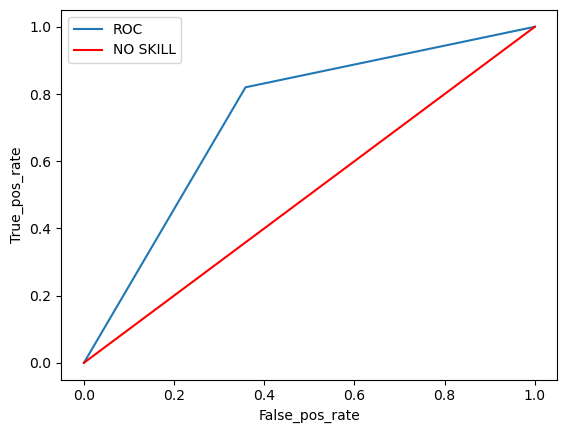

In [64]:
#ROC : Receiver Operating Curve
plt.plot(False_pos_rate,True_pos_rate,label="ROC")
plt.plot([0,1],color="Red",label="NO SKILL")
plt.xlabel("False_pos_rate")
plt.ylabel("True_pos_rate")
plt.legend()


- 2. Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state= 50, criterion="entropy")

In [66]:
dt_model = dt.fit(X_train, Y_train)
Y_pred = dt_model.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.6881807180314643

In [67]:
train_pred = dt.predict(X_train)

In [68]:
print("Model Accuracy: ",accuracy_score(Y_test, Y_pred))

Model Accuracy:  0.6881807180314643


In [69]:
print("Training Accuracy: ",accuracy_score(Y_train, train_pred))

Training Accuracy:  0.9922332055678837


In [70]:
print("confusion Matrix : \n", confusion_matrix(Y_test, Y_pred))
print("-"*50)
print(classification_report(Y_test, Y_pred))

confusion Matrix : 
 [[717 352]
 [421 989]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.63      0.67      0.65      1069
           1       0.74      0.70      0.72      1410

    accuracy                           0.69      2479
   macro avg       0.68      0.69      0.68      2479
weighted avg       0.69      0.69      0.69      2479



- 3. Boosting Classsifiers

In [71]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier

bg = BaggingClassifier()
gb = GradientBoostingClassifier()
ada = AdaBoostClassifier()

In [72]:
gb_model=gb.fit(X_train,Y_train)
Y_pred_gb=gb_model.predict(X_test)

In [73]:
print("Accuracy Score : ", accuracy_score(Y_test,Y_pred_gb))
print("-"*50)
print("confusion Matrix : \n", confusion_matrix(Y_test, Y_pred_gb))
print("-"*50)
print(classification_report(Y_test, Y_pred_gb))

Accuracy Score :  0.7135941912061315
--------------------------------------------------
confusion Matrix : 
 [[ 631  438]
 [ 272 1138]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.59      0.64      1069
           1       0.72      0.81      0.76      1410

    accuracy                           0.71      2479
   macro avg       0.71      0.70      0.70      2479
weighted avg       0.71      0.71      0.71      2479



In [74]:
ada_model=ada.fit(X_train,Y_train)
Y_pred_ada=ada_model.predict(X_test)

In [75]:
print("Accuracy Score : ", accuracy_score(Y_test,Y_pred_ada))
print("-"*50)
print("confusion Matrix : \n", confusion_matrix(Y_test, Y_pred_ada))
print("-"*50)
print(classification_report(Y_test, Y_pred_ada))

Accuracy Score :  0.6716417910447762
--------------------------------------------------
confusion Matrix : 
 [[ 600  469]
 [ 345 1065]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.63      0.56      0.60      1069
           1       0.69      0.76      0.72      1410

    accuracy                           0.67      2479
   macro avg       0.66      0.66      0.66      2479
weighted avg       0.67      0.67      0.67      2479



In [76]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [77]:
from catboost import CatBoostClassifier
cbr = CatBoostClassifier()

In [78]:
cbr_model=cbr.fit(X_train,Y_train)
Y_pred_cbr=cbr_model.predict(X_test)

Learning rate set to 0.027437
0:	learn: 0.6877460	total: 714ms	remaining: 11m 53s
1:	learn: 0.6826570	total: 724ms	remaining: 6m 1s
2:	learn: 0.6779511	total: 735ms	remaining: 4m 4s
3:	learn: 0.6739767	total: 746ms	remaining: 3m 5s
4:	learn: 0.6702278	total: 756ms	remaining: 2m 30s
5:	learn: 0.6662476	total: 767ms	remaining: 2m 7s
6:	learn: 0.6626593	total: 778ms	remaining: 1m 50s
7:	learn: 0.6595392	total: 788ms	remaining: 1m 37s
8:	learn: 0.6564266	total: 798ms	remaining: 1m 27s
9:	learn: 0.6532939	total: 808ms	remaining: 1m 20s
10:	learn: 0.6501921	total: 819ms	remaining: 1m 13s
11:	learn: 0.6474897	total: 830ms	remaining: 1m 8s
12:	learn: 0.6451232	total: 840ms	remaining: 1m 3s
13:	learn: 0.6424191	total: 851ms	remaining: 59.9s
14:	learn: 0.6405801	total: 861ms	remaining: 56.6s
15:	learn: 0.6383468	total: 871ms	remaining: 53.6s
16:	learn: 0.6361026	total: 882ms	remaining: 51s
17:	learn: 0.6337732	total: 893ms	remaining: 48.7s
18:	learn: 0.6314079	total: 905ms	remaining: 46.7s
19:	l

175:	learn: 0.5300654	total: 2.79s	remaining: 13.1s
176:	learn: 0.5298398	total: 2.8s	remaining: 13s
177:	learn: 0.5294894	total: 2.82s	remaining: 13s
178:	learn: 0.5291344	total: 2.83s	remaining: 13s
179:	learn: 0.5287987	total: 2.85s	remaining: 13s
180:	learn: 0.5285625	total: 2.87s	remaining: 13s
181:	learn: 0.5283861	total: 2.88s	remaining: 13s
182:	learn: 0.5281385	total: 2.9s	remaining: 12.9s
183:	learn: 0.5278386	total: 2.91s	remaining: 12.9s
184:	learn: 0.5274788	total: 2.92s	remaining: 12.9s
185:	learn: 0.5272800	total: 2.94s	remaining: 12.9s
186:	learn: 0.5269526	total: 2.95s	remaining: 12.8s
187:	learn: 0.5265436	total: 2.98s	remaining: 12.8s
188:	learn: 0.5262679	total: 2.99s	remaining: 12.8s
189:	learn: 0.5259138	total: 3.01s	remaining: 12.8s
190:	learn: 0.5256586	total: 3.02s	remaining: 12.8s
191:	learn: 0.5252920	total: 3.04s	remaining: 12.8s
192:	learn: 0.5248955	total: 3.05s	remaining: 12.7s
193:	learn: 0.5245935	total: 3.06s	remaining: 12.7s
194:	learn: 0.5244443	tota

335:	learn: 0.4869294	total: 4.87s	remaining: 9.62s
336:	learn: 0.4867540	total: 4.88s	remaining: 9.6s
337:	learn: 0.4865842	total: 4.89s	remaining: 9.59s
338:	learn: 0.4863110	total: 4.91s	remaining: 9.58s
339:	learn: 0.4861596	total: 4.92s	remaining: 9.56s
340:	learn: 0.4858680	total: 4.94s	remaining: 9.54s
341:	learn: 0.4855913	total: 4.95s	remaining: 9.52s
342:	learn: 0.4852429	total: 4.96s	remaining: 9.51s
343:	learn: 0.4849161	total: 4.98s	remaining: 9.49s
344:	learn: 0.4847873	total: 4.99s	remaining: 9.47s
345:	learn: 0.4845834	total: 5s	remaining: 9.45s
346:	learn: 0.4843304	total: 5.01s	remaining: 9.43s
347:	learn: 0.4840710	total: 5.03s	remaining: 9.42s
348:	learn: 0.4839003	total: 5.04s	remaining: 9.4s
349:	learn: 0.4834882	total: 5.05s	remaining: 9.38s
350:	learn: 0.4831464	total: 5.06s	remaining: 9.36s
351:	learn: 0.4829257	total: 5.08s	remaining: 9.34s
352:	learn: 0.4827462	total: 5.09s	remaining: 9.33s
353:	learn: 0.4826450	total: 5.1s	remaining: 9.31s
354:	learn: 0.4824

494:	learn: 0.4498973	total: 6.97s	remaining: 7.11s
495:	learn: 0.4496037	total: 6.98s	remaining: 7.09s
496:	learn: 0.4493858	total: 7s	remaining: 7.08s
497:	learn: 0.4491870	total: 7.01s	remaining: 7.07s
498:	learn: 0.4489886	total: 7.02s	remaining: 7.05s
499:	learn: 0.4487967	total: 7.04s	remaining: 7.04s
500:	learn: 0.4486458	total: 7.05s	remaining: 7.02s
501:	learn: 0.4484148	total: 7.06s	remaining: 7s
502:	learn: 0.4481821	total: 7.07s	remaining: 6.99s
503:	learn: 0.4480074	total: 7.08s	remaining: 6.97s
504:	learn: 0.4478705	total: 7.09s	remaining: 6.95s
505:	learn: 0.4477185	total: 7.1s	remaining: 6.94s
506:	learn: 0.4474576	total: 7.12s	remaining: 6.92s
507:	learn: 0.4472586	total: 7.13s	remaining: 6.9s
508:	learn: 0.4470275	total: 7.14s	remaining: 6.89s
509:	learn: 0.4468606	total: 7.16s	remaining: 6.88s
510:	learn: 0.4466891	total: 7.17s	remaining: 6.86s
511:	learn: 0.4464572	total: 7.19s	remaining: 6.86s
512:	learn: 0.4462685	total: 7.21s	remaining: 6.84s
513:	learn: 0.446043

660:	learn: 0.4199713	total: 8.81s	remaining: 4.52s
661:	learn: 0.4198124	total: 8.82s	remaining: 4.5s
662:	learn: 0.4196533	total: 8.83s	remaining: 4.49s
663:	learn: 0.4194711	total: 8.84s	remaining: 4.47s
664:	learn: 0.4192412	total: 8.86s	remaining: 4.46s
665:	learn: 0.4190997	total: 8.87s	remaining: 4.45s
666:	learn: 0.4189479	total: 8.88s	remaining: 4.43s
667:	learn: 0.4187682	total: 8.89s	remaining: 4.42s
668:	learn: 0.4186334	total: 8.89s	remaining: 4.4s
669:	learn: 0.4184595	total: 8.9s	remaining: 4.38s
670:	learn: 0.4183141	total: 8.91s	remaining: 4.37s
671:	learn: 0.4181087	total: 8.92s	remaining: 4.36s
672:	learn: 0.4179141	total: 8.93s	remaining: 4.34s
673:	learn: 0.4177547	total: 8.94s	remaining: 4.32s
674:	learn: 0.4176452	total: 8.95s	remaining: 4.31s
675:	learn: 0.4174641	total: 8.96s	remaining: 4.29s
676:	learn: 0.4171614	total: 8.97s	remaining: 4.28s
677:	learn: 0.4169968	total: 8.98s	remaining: 4.26s
678:	learn: 0.4168433	total: 8.99s	remaining: 4.25s
679:	learn: 0.4

837:	learn: 0.3927196	total: 10.5s	remaining: 2.03s
838:	learn: 0.3926264	total: 10.5s	remaining: 2.02s
839:	learn: 0.3925043	total: 10.5s	remaining: 2s
840:	learn: 0.3923237	total: 10.5s	remaining: 1.99s
841:	learn: 0.3921947	total: 10.5s	remaining: 1.98s
842:	learn: 0.3920758	total: 10.6s	remaining: 1.97s
843:	learn: 0.3919701	total: 10.6s	remaining: 1.95s
844:	learn: 0.3918266	total: 10.6s	remaining: 1.94s
845:	learn: 0.3917389	total: 10.6s	remaining: 1.93s
846:	learn: 0.3916207	total: 10.6s	remaining: 1.91s
847:	learn: 0.3915536	total: 10.6s	remaining: 1.9s
848:	learn: 0.3914213	total: 10.6s	remaining: 1.89s
849:	learn: 0.3912668	total: 10.6s	remaining: 1.88s
850:	learn: 0.3911029	total: 10.6s	remaining: 1.86s
851:	learn: 0.3908564	total: 10.6s	remaining: 1.85s
852:	learn: 0.3907351	total: 10.7s	remaining: 1.84s
853:	learn: 0.3906124	total: 10.7s	remaining: 1.82s
854:	learn: 0.3904722	total: 10.7s	remaining: 1.81s
855:	learn: 0.3903093	total: 10.7s	remaining: 1.8s
856:	learn: 0.390

In [79]:
train_pred = cbr.predict(X_train)
print("Accuracy Score : ", accuracy_score(Y_test,Y_pred_cbr))
print("-"*50)
print("Training Accuracy: ",accuracy_score(Y_train, train_pred))
print("-"*50)
print("confusion Matrix : \n", confusion_matrix(Y_test, Y_pred_cbr))
print("-"*50)
print(classification_report(Y_test, Y_pred_cbr))

Accuracy Score :  0.7511093182734974
--------------------------------------------------
Training Accuracy:  0.858079483558604
--------------------------------------------------
confusion Matrix : 
 [[ 708  361]
 [ 256 1154]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.66      0.70      1069
           1       0.76      0.82      0.79      1410

    accuracy                           0.75      2479
   macro avg       0.75      0.74      0.74      2479
weighted avg       0.75      0.75      0.75      2479



In [80]:
False_pos_rate, True_pos_rate, threshold = roc_curve(Y_test, Y_pred_cbr)

threshold

array([2, 1, 0], dtype=int64)

In [81]:
False_pos_rate, True_pos_rate, threshold = roc_curve(Y_test, Y_pred_cbr)

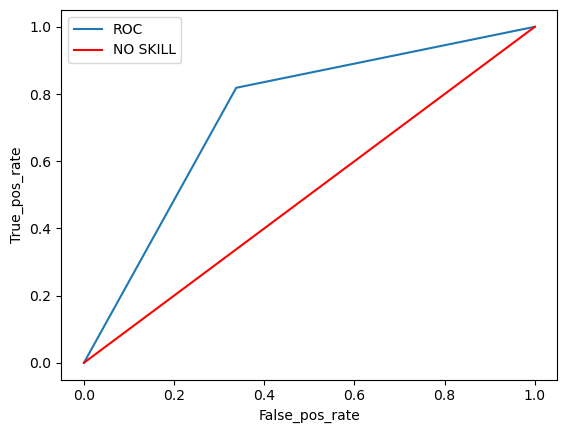

In [82]:
#ROC : Receiver Operating Curve
plt.plot(False_pos_rate,True_pos_rate,label="ROC")
plt.plot([0,1],color="Red",label="NO SKILL")
plt.xlabel("False_pos_rate")
plt.ylabel("True_pos_rate")
plt.legend()


- 4. LogisticRegression

In [83]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [84]:
lr_model = lr.fit(X_train, Y_train)
Y_pred_lr = lr_model.predict(X_test)

In [85]:
print("Accuracy Score : ", accuracy_score(Y_test,Y_pred_lr))
print("-"*50)
print("confusion Matrix : \n", confusion_matrix(Y_test, Y_pred_lr))
print("-"*50)
print(classification_report(Y_test, Y_pred_lr))

Accuracy Score :  0.6728519564340459
--------------------------------------------------
confusion Matrix : 
 [[ 605  464]
 [ 347 1063]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.64      0.57      0.60      1069
           1       0.70      0.75      0.72      1410

    accuracy                           0.67      2479
   macro avg       0.67      0.66      0.66      2479
weighted avg       0.67      0.67      0.67      2479



- 5. XGBoosting Classifier

In [86]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [87]:
from xgboost import XGBClassifier

In [88]:
print(X_train.columns)
print("- - "*50)
print(X_test.columns)

Index(['temperature', 'has_children', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'destination_Home', 'destination_No Urgent Place',
       'destination_Work', 'passanger_Alone', 'passanger_Friend(s)',
       'passanger_Kid(s)', 'passanger_Partner', 'weather_Rainy',
       'weather_Snowy', 'weather_Sunny', 'coupon_Bar',
       'coupon_Carry out & Take away', 'coupon_Coffee House',
       'coupon_Restaurant(20-50)', 'coupon_Restaurant(<20)', 'expiration_1d',
       'expiration_2h', 'gender_Female', 'gender_Male', 'age_21', 'age_26',
       'age_31', 'age_36', 'age_41', 'age_46', 'age_50plus', 'age_below21',
       'maritalStatus_Divorced', 'maritalStatus_Married partner',
       'maritalStatus_Single', 'maritalStatus_Unmarried partner',
       'maritalStatus_Widowed', 'education_Associates degree',
       'education_Bachelors degree',
       'education_Graduate degree (Masters or Doctorate)',
       'education_High School Graduate', 'education_Some High School',
 

In [89]:
X1_train = X_train[["coupon_Restaurant(<20)"]].rename(columns = {"coupon_Restaurant(<20)": "coupon_Restaurant(20)", "v1": "Label"})

X1_test = X_test[["coupon_Restaurant(<20)"]].rename(columns = {"coupon_Restaurant(<20)": "coupon_Restaurant(20)", "v1": "Label"})

In [90]:
xg = XGBClassifier()
xg_model=xg.fit(X1_train,Y_train)
Y_pred_xg=xg_model.predict(X1_test)

In [91]:
print("Accuracy Score : ", accuracy_score(Y_test,Y_pred_xg))
print("-"*50)
print("confusion Matrix : \n", confusion_matrix(Y_test, Y_pred_xg))
print("-"*50)
print(classification_report(Y_test, Y_pred_xg))

Accuracy Score :  0.5687777329568374
--------------------------------------------------
confusion Matrix : 
 [[   0 1069]
 [   0 1410]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1069
           1       0.57      1.00      0.73      1410

    accuracy                           0.57      2479
   macro avg       0.28      0.50      0.36      2479
weighted avg       0.32      0.57      0.41      2479

